In [1]:
# EOReader Imports
import os
import xarray as xr
from eoreader.reader import Reader
from eoreader.products import SensorType
from eoreader.bands import BLUE, GREEN, RED, NIR, SWIR_1, VV, VV_DSPK, SLOPE, HILLSHADE
from sertit import display

reader = Reader()

In [2]:
# Create logger
import logging
from sertit import logs

logger = logging.getLogger("eoreader")
logs.init_logger(logger)

In [3]:
# Set a DEM
from eoreader.env_vars import DEM_PATH

os.environ[DEM_PATH] = os.path.join("/home", "data", "DS2", "BASES_DE_DONNEES", "GLOBAL", "COPDEM_30m",
                                    "COPDEM_30m.vrt")

In [4]:
# Paths
stack_folder = os.path.join("/home", "data", "DS3", "CI", "eoreader", "others")
opt_path = os.path.join(stack_folder, "20200310T030415_WV02_Ortho_BGRN_STK.tif")
sar_path = os.path.join(stack_folder, "20210827T162210_ICEYE_SC_GRD_STK.tif")

In [5]:
# Optical minimum example
opt_prod = reader.open(opt_path,
                       custom=True,
                       sensor_type="OPTICAL",  # With a string
                       band_map={BLUE: 1, GREEN: 2, RED: 3, NIR: 4, SWIR_1: 5})
opt_prod

eoreader.CustomProduct '20200310T030415_WV02_Ortho_BGRN_STK'
Attributes:
	condensed_name: 20230322T145628_CUSTOM_CUSTOM
	path: /home/data/DS3/CI/eoreader/others/20200310T030415_WV02_Ortho_BGRN_STK.tif
	constellation: CUSTOM
	sensor type: Optical
	product type: CUSTOM
	default resolution: 7.999924228754893
	acquisition datetime: 2023-03-22T14:56:28.097814
	band mapping:
		BLUE: 1
		GREEN: 2
		RED: 3
		NIR: 4
		SWIR_1: 5
	needs extraction: False

In [6]:
opt_stack = opt_prod.stack([BLUE, GREEN, RED])

2023-03-22 14:56:28,107 - [DEBUG] - Loading bands ['BLUE', 'RED', 'GREEN']


2023-03-22 14:56:28,240 - [DEBUG] - Stacking


2023-03-22 14:56:28,255 - [DEBUG] - Saving stack


/opt/conda/lib/python3.10/site-packages/dask/array/core.py:1712: FutureWarning: The `numpy.nanpercentile` function is not implemented by Dask array. You may want to use the da.map_blocks function or something similar to silence this warning. Your code may stop working in a future release.
  warnings.warn(


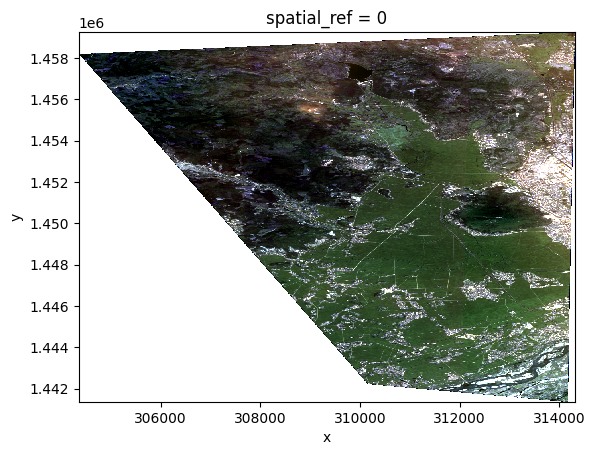

In [7]:
xr.plot.imshow(opt_stack.copy(data=display.scale(opt_stack.data)))

In [8]:
opt_stack

<xarray.DataArray 'BLUE_GREEN_RED' (z: 3, y: 2237, x: 1244)>
dask.array<transpose, shape=(3, 2237, 1244), dtype=float32, chunksize=(1, 2048, 1244), chunktype=numpy.ndarray>
Coordinates:
  * x            (x) float64 3.044e+05 3.044e+05 ... 3.143e+05 3.143e+05
  * y            (y) float64 1.459e+06 1.459e+06 ... 1.441e+06 1.441e+06
    spatial_ref  int64 0
  * z            (z) object MultiIndex
  * variable     (z) object 'BLUE' 'GREEN' 'RED'
  * band         (z) int64 1 1 1
Attributes:
    long_name:         BLUE GREEN RED
    constellation:     CUSTOM
    constellation_id:  CUSTOM
    product_path:      /home/data/DS3/CI/eoreader/others/20200310T030415_WV02...
    product_name:      20200310T030415_WV02_Ortho_BGRN_STK
    product_filename:  20200310T030415_WV02_Ortho_BGRN_STK
    instrument:        CUSTOM
    product_type:      CUSTOM
    acquisition_date:  20230322T145628
    condensed_name:    20230322T145628_CUSTOM_CUSTOM
    orbit_direction:   None

In [9]:
# SAR minimum example
sar_prod = reader.open(sar_path,
                       custom=True,
                       sensor_type=SensorType.SAR,  # With the Enum
                       band_map={VV: 1, VV_DSPK: 2})
sar_prod

eoreader.CustomProduct '20210827T162210_ICEYE_SC_GRD_STK'
Attributes:
	condensed_name: 20230322T145629_CUSTOM_CUSTOM
	path: /home/data/DS3/CI/eoreader/others/20210827T162210_ICEYE_SC_GRD_STK.tif
	constellation: CUSTOM
	sensor type: SAR
	product type: CUSTOM
	default resolution: 47.995955510616774
	acquisition datetime: 2023-03-22T14:56:29.829621
	band mapping:
		VV: 1
		VV_DSPK: 2
	needs extraction: False

In [10]:
sar_stack = sar_prod.stack([SLOPE, VV, VV_DSPK])

2023-03-22 14:56:29,862 - [DEBUG] - Loading bands ['VV', 'VV_DSPK']


2023-03-22 14:56:29,908 - [DEBUG] - Loading DEM bands ['SLOPE']


2023-03-22 14:56:29,909 - [DEBUG] - Warping DEM for 20230322T145629_CUSTOM_CUSTOM


2023-03-22 14:56:29,912 - [DEBUG] - Using DEM: /home/data/DS2/BASES_DE_DONNEES/GLOBAL/COPDEM_30m/COPDEM_30m.vrt


2023-03-22 14:56:30,529 - [DEBUG] - Computing slope for 20230322T145629_CUSTOM_CUSTOM


2023-03-22 14:56:35,630 - [DEBUG] - Stacking


2023-03-22 14:56:35,646 - [DEBUG] - Saving stack


/opt/conda/lib/python3.10/site-packages/dask/array/core.py:1712: FutureWarning: The `numpy.nanpercentile` function is not implemented by Dask array. You may want to use the da.map_blocks function or something similar to silence this warning. Your code may stop working in a future release.
  warnings.warn(


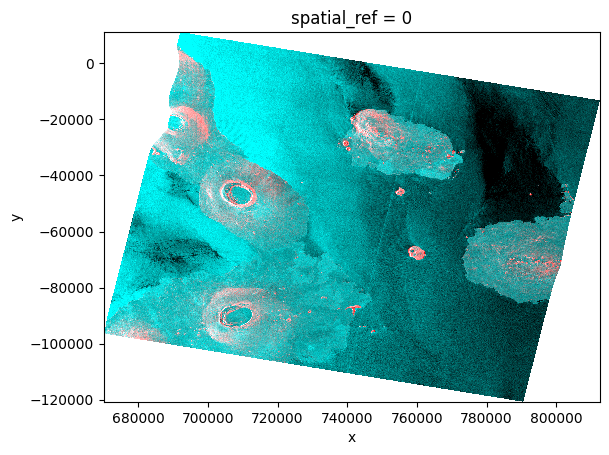

In [11]:
xr.plot.imshow(sar_stack.copy(data=display.scale(sar_stack.data)))

In [12]:
sar_stack

<xarray.DataArray 'SLOPE_VV_VV_DSPK' (z: 3, y: 2748, x: 2967)>
dask.array<transpose, shape=(3, 2748, 2967), dtype=float32, chunksize=(1, 2048, 2048), chunktype=numpy.ndarray>
Coordinates:
  * x            (x) float64 6.7e+05 6.701e+05 6.701e+05 ... 8.124e+05 8.124e+05
  * y            (y) float64 1.113e+04 1.109e+04 ... -1.206e+05 -1.207e+05
    spatial_ref  int64 0
  * z            (z) object MultiIndex
  * variable     (z) object 'SLOPE' 'VV' 'VV_DSPK'
  * band         (z) int64 1 1 1
Attributes:
    long_name:         SLOPE VV VV_DSPK
    constellation:     CUSTOM
    constellation_id:  CUSTOM
    product_path:      /home/data/DS3/CI/eoreader/others/20210827T162210_ICEY...
    product_name:      20210827T162210_ICEYE_SC_GRD_STK
    product_filename:  20210827T162210_ICEYE_SC_GRD_STK
    instrument:        CUSTOM
    product_type:      CUSTOM
    acquisition_date:  20230322T145635
    condensed_name:    20230322T145629_CUSTOM_CUSTOM
    orbit_direction:   None

<Axes: >

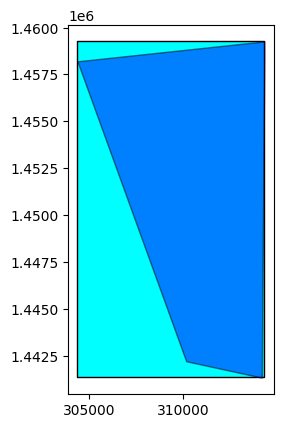

In [13]:
# You can compute the footprint and the extent
extent = opt_prod.extent()
footprint = opt_prod.footprint()
base = extent.plot(color='cyan', edgecolor='black')
footprint.plot(ax=base, color='blue', edgecolor='black', alpha=0.5)

<Axes: >

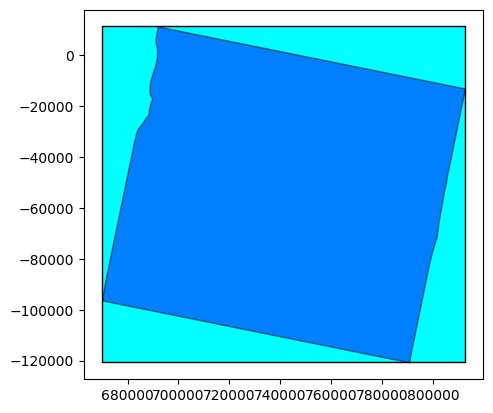

In [14]:
extent = sar_prod.extent()
footprint = sar_prod.footprint()
base = extent.plot(color='cyan', edgecolor='black')
footprint.plot(ax=base, color='blue', edgecolor='black', alpha=0.5)

In [15]:
# Optical
opt_prod = reader.open(
    opt_path,
    custom=True,
    name="20200310T030415_WV02_Ortho",
    datetime="20200310T030415",
    sensor_type=SensorType.OPTICAL,
    constellation="WV02",
    product_type="Ortho",
    resolution=2.0,
    sun_azimuth=10.0,
    sun_zenith=20.0,
    band_map={BLUE: 1, GREEN: 2, RED: 3, NIR: 4, SWIR_1: 5},
)
hillshade = opt_prod.load(HILLSHADE)[HILLSHADE]

2023-03-22 14:56:39,820 - [DEBUG] - Loading DEM bands ['HILLSHADE']


2023-03-22 14:56:39,821 - [DEBUG] - Warping DEM for 20200310T030415_WV02_Ortho


2023-03-22 14:56:39,824 - [DEBUG] - Using DEM: /home/data/DS2/BASES_DE_DONNEES/GLOBAL/COPDEM_30m/COPDEM_30m.vrt


2023-03-22 14:56:40,376 - [DEBUG] - Computing hillshade DEM for 20200310T030415_WV02_Ortho


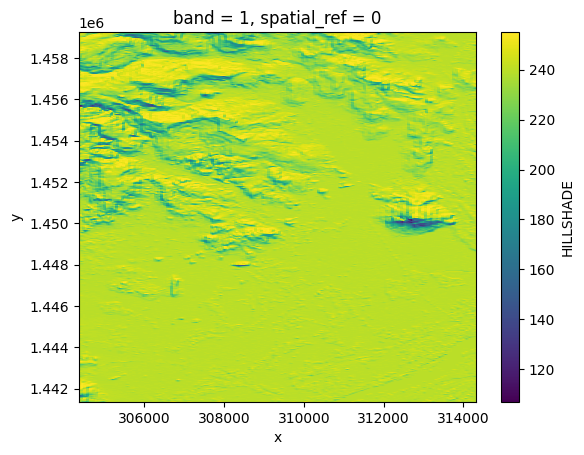

In [16]:
hillshade.plot()

In [17]:
hillshade

<xarray.DataArray 'HILLSHADE' (band: 1, y: 8948, x: 4976)>
dask.array<where, shape=(1, 8948, 4976), dtype=float32, chunksize=(1, 2048, 2048), chunktype=numpy.ndarray>
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 3.044e+05 3.044e+05 ... 3.143e+05 3.143e+05
  * y            (y) float64 1.459e+06 1.459e+06 ... 1.441e+06 1.441e+06
    spatial_ref  int64 0
Attributes:
    long_name:         HILLSHADE
    constellation:     WorldView-2
    constellation_id:  WV02
    product_path:      /home/data/DS3/CI/eoreader/others/20200310T030415_WV02...
    product_name:      20200310T030415_WV02_Ortho
    product_filename:  20200310T030415_WV02_Ortho_BGRN_STK
    instrument:        CUSTOM
    product_type:      Ortho
    acquisition_date:  20200310T030415
    condensed_name:    20200310T030415_WV02_Ortho
    orbit_direction:   None

In [18]:
# SAR
sar_prod = reader.open(
    sar_path,
    custom=True,
    sensor_type=SensorType.SAR,
    name="20210827T162210_ICEYE_SC_GRD",
    datetime="20210827T162210",
    constellation="ICEYE",
    product_type="GRD",
    resolution=6.0,
    band_map={VV: 1, VV_DSPK: 2},
)

In [19]:
from pprint import pprint
from eoreader import utils

# Read and display metadata
mtd, _ = sar_prod.read_mtd()
pprint(utils.quick_xml_to_dict(mtd))

('custom_metadata',
 {'band_map': "{'VV': 1, 'VV_DSPK': 2}",
  'cloud_cover': 'None',
  'constellation': 'ICEYE',
  'datetime': '2021-08-27T16:22:10',
  'instrument': 'CUSTOM',
  'name': '20210827T162210_ICEYE_SC_GRD',
  'orbit_direction': 'None',
  'product_type': 'GRD',
  'resolution': '6.0',
  'sensor_type': 'SAR',
  'sun_azimuth': 'None',
  'sun_zenith': 'None'})
